In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#checking of the missing values
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

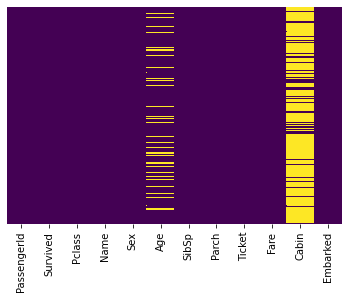

In [6]:
#Creating heatmap for the missing values
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [7]:
#setting the background of the plot as white grid
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

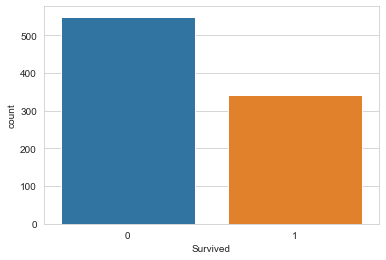

In [10]:
#checking the counts of the target variable for see if the data is imbalanced or not
sns.countplot(x = 'Survived',data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

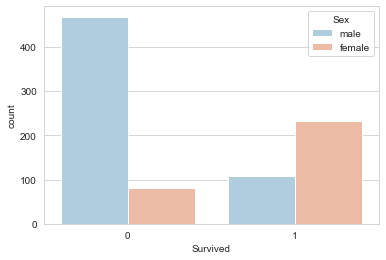

In [12]:
#checking the counts of the target variable against the sex of the passengers
sns.countplot(x = 'Survived',data = train,hue = 'Sex',palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

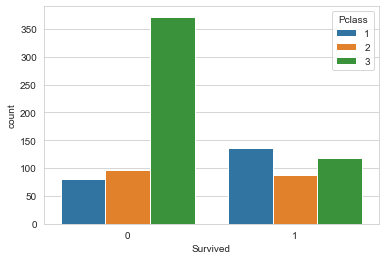

In [15]:
#checking the counts of the target variable against the class of the passengers
sns.countplot(x = 'Survived',data = train,hue = 'Pclass')

<AxesSubplot:xlabel='Age', ylabel='Count'>

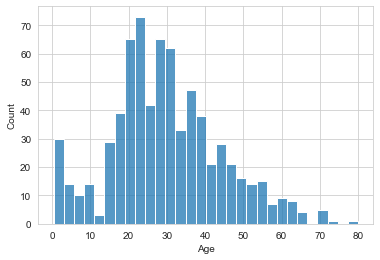

In [17]:
#checking the distribution of the passengers by age, we will create a histogram for this distribution
sns.histplot(train['Age'].dropna(),bins= 30)

<AxesSubplot:ylabel='Frequency'>

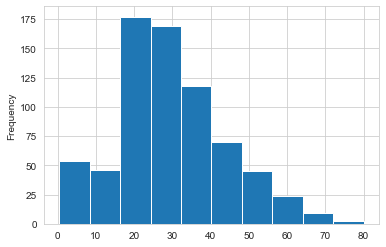

In [18]:
train['Age'].plot.hist() #another way of creating histogram

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

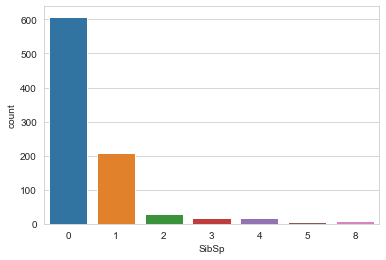

In [20]:
#Now plotting the number of siblings onboard
sns.countplot(data = train,x = 'SibSp')

<AxesSubplot:ylabel='Frequency'>

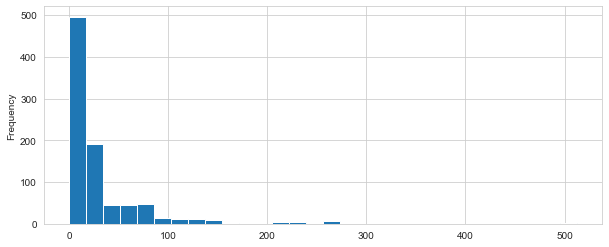

In [23]:
#Checking the distribution of the fare
train['Fare'].plot.hist(bins = 30,figsize = (10,4))

Imputing data in 'Age' column based on the class average

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

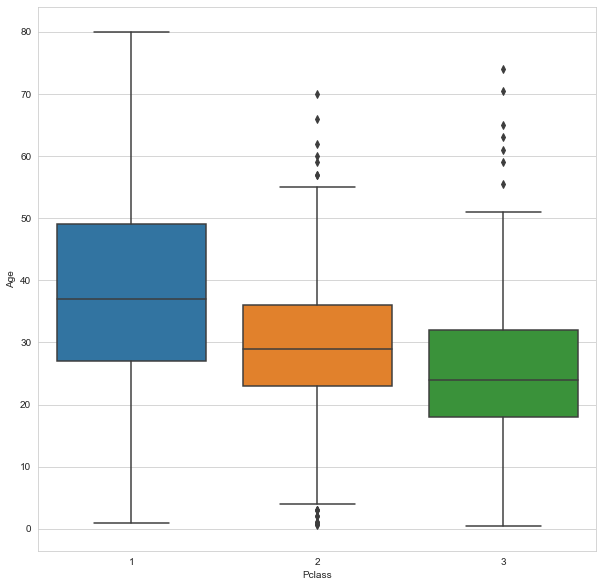

In [29]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Pclass',y = 'Age', data = train)

In [32]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        
        elif Pclass==2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [33]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

<AxesSubplot:>

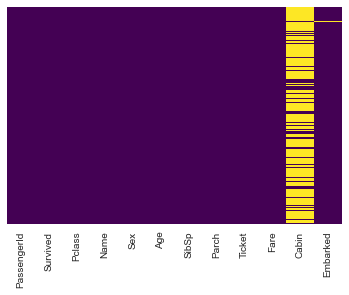

In [36]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [37]:
#dropping the cabin column
train.drop('Cabin',axis = 1,inplace = True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

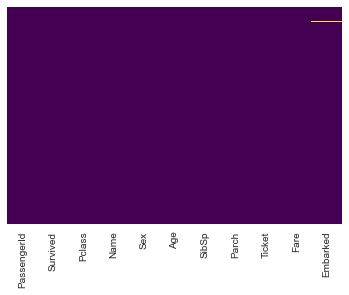

In [39]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [40]:
#Removing the rows with missing values
train.dropna(inplace =True)

<AxesSubplot:>

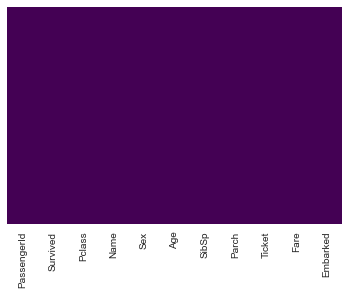

In [41]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [44]:
#Now we need to convert the categorical variables into dummy variables
#We will get the 'get_dummies' method
sex = pd.get_dummies(train['Sex'],drop_first = True) #We drop one of the column as the other column is a perfect predictor
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [46]:
#creating dummies for 'Embark' column
embarked = pd.get_dummies(train['Embarked'],drop_first = True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [48]:
#now we will concat the new columns together
train = pd.concat([train,sex,embarked],axis = 1)

In [50]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [51]:
#Removing the columns that we do not need for making logistic regression model
train.drop(['Name','Sex','Ticket','Embarked'],axis = 1,inplace = True)

In [52]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [53]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [54]:
#Dropping the 'Passenger ID' column from the dataset as it is of no use
train.drop('PassengerId',axis = 1, inplace = True)

In [55]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


# Splitting Train & Test Dataset

In [56]:
#separate X and Y from the dataset
x = train.drop('Survived',axis = 1)
y = train['Survived']

In [57]:
#Importing Train Test Split module
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

# Creating Logistic Model

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
#creating an instance of estimator
logmodel = LogisticRegression()

In [62]:
logmodel.fit(X_train,y_train)

C:\Users\ishik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
predictions = logmodel.predict(X_test)

**Now for getting the classification report**

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [66]:
#If you want confusion matrix then,
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)